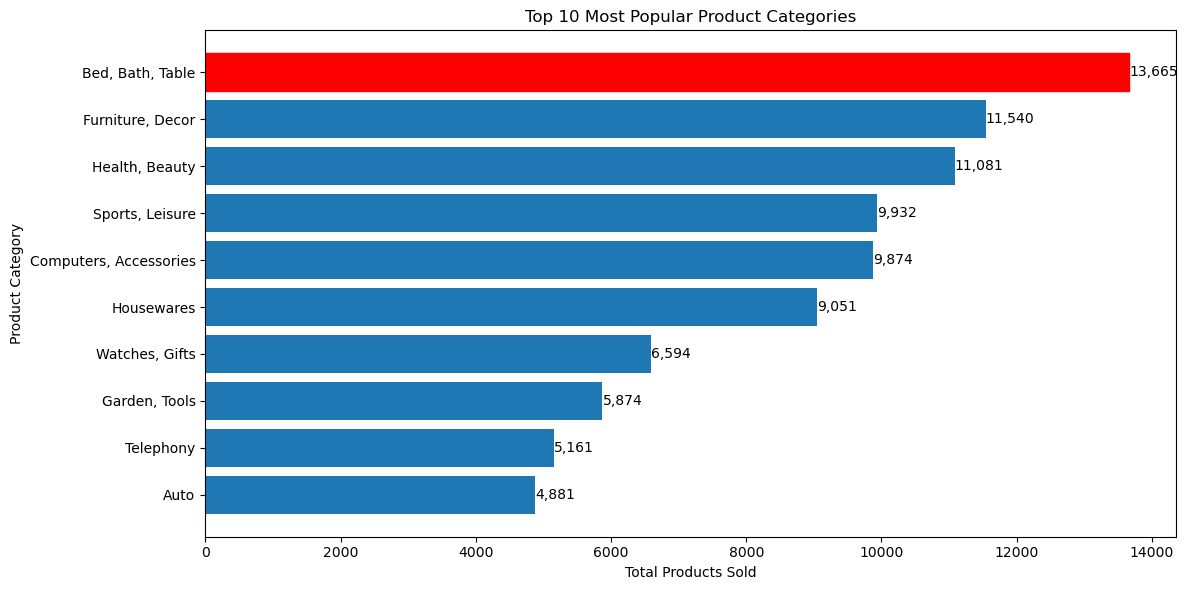

Top 10 Most Popular Product Categories:
   product_category_name_english  order_item_id
7               Bed, Bath, Table          13665
39              Furniture, Decor          11540
43                Health, Beauty          11081
65               Sports, Leisure           9932
15        Computers, Accessories           9874
49                    Housewares           9051
70                Watches, Gifts           6594
42                 Garden, Tools           5874
68                     Telephony           5161
5                           Auto           4881


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV files
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')

# Merge data from order_items and products based on product_id
merged_data = pd.merge(order_items, products, on='product_id')

# Merge merged_data with category_translation data based on product_category_name
merged_data = pd.merge(merged_data, category_translation, on='product_category_name')

# Calculate the total sold products for each product category
product_sales = merged_data.groupby('product_category_name_english')['order_item_id'].sum().reset_index()

# Get the top 10 most popular product categories
top_10_categories = product_sales.sort_values(by='order_item_id', ascending=False).head(10)

# Modify category names for capitalization and customization
top_10_categories['product_category_name_english'] = top_10_categories['product_category_name_english'].str.title()
top_10_categories['product_category_name_english'] = top_10_categories['product_category_name_english'].str.replace('_', ', ')

# Create a bar plot to visualize the top 10 categories with modified names
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_categories['product_category_name_english'], top_10_categories['order_item_id'])
plt.xlabel('Total Products Sold')
plt.ylabel('Product Category')
plt.title('Top 10 Most Popular Product Categories')
plt.gca().invert_yaxis()

# Add labels for each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width):,}', va='center')
    
# Color the top 1 bar red
bars[0].set_color('red')

plt.tight_layout()

# Display the plot
plt.show()

# Display the top 10 categories in tabular form with modified names
print("Top 10 Most Popular Product Categories:")
print(top_10_categories)